# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [41]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
    StochasticAverageGradient
)
from utils import LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: https://contest.yandex.ru/contest/19551/run-report/36912255/
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/36908953/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/36908959/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/36914459/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/36910221/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("autos.csv")
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000


In [10]:
data.isna().sum()

brand                  0
model                  0
vehicleType            0
gearbox                0
fuelType               0
notRepairedDamage      0
powerPS                0
kilometer              0
yearOfRegistration     0
monthOfRegistration    0
dateCreated            0
lastSeen               0
postalCode             0
price                  0
dtype: int64

In [11]:
data.dateCreated = pd.to_datetime(data.dateCreated)
data.lastSeen = pd.to_datetime(data.lastSeen)

data['createdYear'] = data.dateCreated.dt.year
data['createdMonth'] = data.dateCreated.dt.month
data['createdDay'] = data.dateCreated.dt.day

data['lastSeenYear'] = data.lastSeen.dt.year
data['lastSeenMonth'] = data.lastSeen.dt.month
data['lastSeenDay'] = data.lastSeen.dt.day
data['lastSeenHour'] = data.lastSeen.dt.hour
data['lastSeenMinute'] = data.lastSeen.dt.hour

data.drop(columns=['dateCreated', 'lastSeen'], inplace=True)
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,postalCode,price,createdYear,createdMonth,createdDay,lastSeenYear,lastSeenMonth,lastSeenDay,lastSeenHour,lastSeenMinute
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,91074,1500,2016,3,17,2016,3,17,17,17
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,60437,3600,2016,3,31,2016,4,6,10,10
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,33775,650,2016,4,4,2016,4,6,19,19
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,67112,2200,2016,4,1,2016,4,5,18,18
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,96224,2000,2016,3,26,2016,4,6,10,10


In [12]:
data.drop(columns=['brand', 'model'], inplace=True)

In [13]:
type_onehot = pd.get_dummies(data.vehicleType, 'vehicleType')
data = data.join(type_onehot)
gear_onehot = pd.get_dummies(data.gearbox, 'gearbox')
data = data.join(gear_onehot)
fuel_onehot = pd.get_dummies(data.fuelType, 'fuelType')
data = data.join(fuel_onehot)
repaired_onehot = pd.get_dummies(data.notRepairedDamage, 'notRepairedDamage')
data = data.join(repaired_onehot)


In [14]:
from sklearn.preprocessing import StandardScaler

data.drop(columns=['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage'], inplace=True)
scaler = StandardScaler()
data.loc[:, :'lastSeenMinute'] = scaler.fit_transform(data.loc[:, :'lastSeenMinute'])
data.head()

,powerPS,kilometer,yearOfRegistration,monthOfRegistration,postalCode,price,createdYear,createdMonth,createdDay,lastSeenYear,...,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,notRepairedDamage_ja,notRepairedDamage_nein
0,-0.875060,0.659045,-0.389010,-0.064438,1.508045,-0.658511,0.00984,-0.429275,0.128375,0.0,...,1,0,1,0,0,0,0,0,0,1
1,-0.971769,-0.846439,0.703385,0.225765,0.321583,-0.396999,0.00984,-0.429275,1.656047,0.0,...,1,0,0,0,1,0,0,0,0,1
2,-0.439869,0.659045,-1.325348,1.096374,-0.710941,-0.764361,0.00984,2.194778,-1.290178,0.0,...,1,0,1,0,0,0,0,0,1,0
3,-0.327041,0.659045,0.079160,0.515968,0.580082,-0.571341,0.00984,2.194778,-1.617536,0.0,...,1,0,1,0,0,0,0,0,0,1
4,-0.391514,0.659045,0.079160,1.676780,1.707486,-0.596247,0.00984,-0.429275,1.110450,0.0,...,1,0,1,0,0,0,0,0,0,1


In [15]:
price_log = np.log1p(data.price)
data.drop(columns=['price'], inplace=True)

In [16]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(data, price_log, test_size=0.2, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [21]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

w0 = np.zeros(X_train.shape[1])

descents = [GradientDescent, StochasticDescent, MomentumDescent, Adagrad]

interval = np.logspace(-5, 5)
all_results = {}
np.seterr(all='ignore')
for method in descents:
    res = []
    best = -1
    for lambd in interval:
        cur_method = method(lambda_=lambd, w0=w0)
        regression = LinearRegression(descent = cur_method, max_iter = 80)
        regression.fit(X_train.values, y_train.values)
        validate_pred = regression.predict(X_validate)
        train_pred = regression.predict(X_train)
        test_pred = regression.predict(X_test)
        
        if np.isnan(validate_pred).sum() + np.isnan(train_pred).sum() +\
                  + np.isnan(test_pred).sum() == 0:
            cur_res = (mse(y_validate, validate_pred), len(regression.loss_history), lambd,
                            mse(y_train, train_pred), mse(y_test, test_pred),
                            r2_score(y_train, train_pred),
                            r2_score(y_validate, validate_pred),
                            r2_score(y_test, test_pred),
                            regression.loss_history)
            if best == -1 or cur_res < best:
                best = cur_res
    print(f'best lambda for {method.__name__} is {best[2]}')
    print(f'validate mse: {best[0]}')
    print(f'train mse: {best[3]}')
    print(f'test mse: {best[4]}')
    print(f'validate r2: {best[6]}')
    print(f'test r2: {best[7]}')
    print(f'number of iterations: {best[1]}\n')
    all_results[method.__name__] = best
    
    
                
            
        


best lambda for GradientDescent is 2.0235896477251556
validate mse: 0.16485607386077547
train mse: 0.16597704361672766
test mse: 0.16746005096762254
validate r2: 0.7460050283942385
test r2: 0.7441488733592404
number of iterations: 51

best lambda for StochasticDescent is 0.07543120063354623
validate mse: 0.509942637344969
train mse: 0.5091077396466536
test mse: 0.5140379937082874
validate r2: 0.21432760917024296
test r2: 0.21463537681683187
number of iterations: 4

best lambda for MomentumDescent is 2.0235896477251556
validate mse: 0.16489571342764248
train mse: 0.16601811180554793
test mse: 0.16750469304509166
validate r2: 0.7459439554205527
test r2: 0.7440806676842149
number of iterations: 39

best lambda for Adagrad is 0.30888435964774846
validate mse: 0.1720056919370056
train mse: 0.17295052506150216
test mse: 0.17438441062760912
validate r2: 0.7349895589745451
test r2: 0.7335696026016081
number of iterations: 8



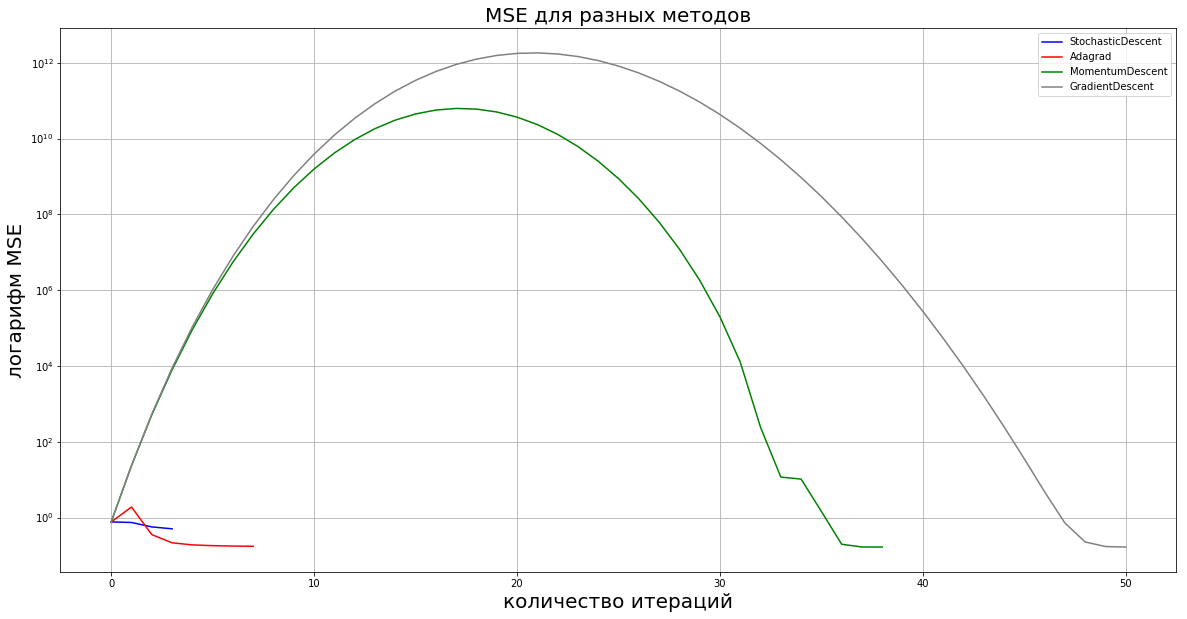

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
plt.title('MSE для разных методов', size=20)
plt.xlabel("количество итераций", size=20)
plt.ylabel("логарифм MSE", size=20)
plt.yscale('log')
plt.plot(np.arange(0, all_results['StochasticDescent'][1]), all_results['StochasticDescent'][8], color="blue", label="StochasticDescent")
plt.plot(np.arange(0, all_results['Adagrad'][1]), all_results['Adagrad'][8], color="red", label="Adagrad")
plt.plot(np.arange(0, all_results['MomentumDescent'][1]), all_results['MomentumDescent'][8], color="green", label="MomentumDescent")
plt.plot(np.arange(0, all_results['GradientDescent'][1]), all_results['GradientDescent'][8], color="grey", label="GradientDescent")
plt.grid()
plt.legend()

Как мы видим Adagard, MomentDescent и GradientDescent добились примерно одинкового MSE, но преимущество имеет Adagard, тк ему потребовалось меньшее количество итераций. На фоне этих трех методов выделяется StochasticDescent, ему потребовалось меньше всего итераций, но и мсе у него почти на порядок выше, чем у остальных методов

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 10)


## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [ ]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [69]:
w0 = np.zeros(X_train.shape[1])

descents = [StochasticAverageGradient, GradientDescent]

interval = np.logspace(-5, 5)
all_results = {}
np.seterr(all='ignore')
for method in descents:
    res = []
    best = -1
    for lambd in interval:
        if method.__name__ == 'StochasticAverageGradient':
            cur_method = method(lambda_=lambd, w0=w0, x_shape = X_train.shape[0])
        else:
            cur_method = method(lambda_=lambd, w0=w0)
        regression = LinearRegression(descent = cur_method, max_iter = 100, tolerance=-1)
        regression.fit(X_train.values, y_train.values)
        validate_pred = regression.predict(X_validate)
        train_pred = regression.predict(X_train)
        test_pred = regression.predict(X_test)
        
        if np.isnan(validate_pred).sum() + np.isnan(train_pred).sum() +\
                  + np.isnan(test_pred).sum() == 0:
            cur_res = (mse(y_validate, validate_pred), lambd,
                            mse(y_train, train_pred), mse(y_test, test_pred),
                            r2_score(y_train, train_pred),
                            r2_score(y_validate, validate_pred),
                            r2_score(y_test, test_pred),
                            regression.loss_history)
            if best == -1 or cur_res < best:
                best = cur_res
    print(f'best lambda for {method.__name__} is {best[1]}')
    print(f'validate mse: {best[0]}')
    print(f'train mse: {best[2]}')
    print(f'test mse: {best[3]}')
    print(f'validate r2: {best[5]}')
    print(f'test r2: {best[6]}')
    print(f'number of iterations: {len(best[7])}\n')
    all_results[method.__name__] = best
    

best lambda for StochasticAverageGradient is 86.85113737513521
validate mse: 0.23987128413218312
train mse: 0.24237168984389354
test mse: 0.24340376735002747
validate r2: 0.63042853942012
test r2: 0.6281194962901904
number of iterations: 100

best lambda for GradientDescent is 2.0235896477251556
validate mse: 0.1647250809981722
train mse: 0.16581272795025667
test mse: 0.1672825991153751
validate r2: 0.7462068500659447
test r2: 0.7444199902976365
number of iterations: 100



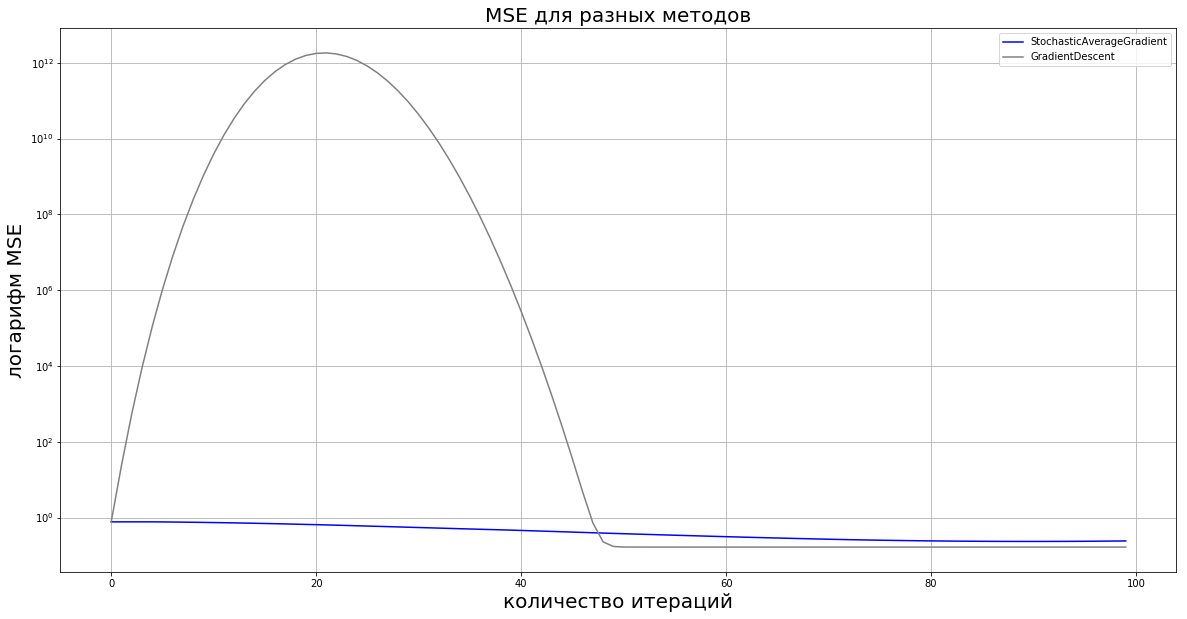

In [80]:
fig = plt.figure(figsize=(20, 10))
plt.title('MSE для разных методов', size=20)
plt.xlabel("количество итераций", size=20)
plt.ylabel("логарифм MSE", size=20)
plt.yscale('log')
plt.plot(np.arange(0, len(all_results['StochasticAverageGradient'][7])), all_results['StochasticAverageGradient'][7], color="blue", label="StochasticAverageGradient")
plt.plot(np.arange(0, len(all_results['GradientDescent'][7])), all_results['GradientDescent'][7], color="grey", label="GradientDescent")
plt.grid()
plt.legend()

Как мы видим StochasticAverageGradient сходится медленнее, чем обычный градиентный спуск, но, как говорится, медленно, но верно. Возможно это происходит потому, что на большом количестве данных изменение градиента одного компонента почти не сказывается на изменении веса